# Scene Text Detection with EAST

This notebook uses an open source implementation of the paper [EAST: An Efficient and Accurate Scene Text Detector](https://arxiv.org/abs/1704.03155) to detect scene text on a given image.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install argman/EAST

 Install the open source project [argman/EAST](https://github.com/argman/EAST.git):

In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/argman/EAST.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q $git_repo_url
  #!cd $project_name && pip install -q -r requirements.txt
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Download pretrained model

In [0]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=$file_id" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=$confirm_text&id=$file_id" -o $file_name
  

pretrained_model = 'east_icdar2015_resnet_v1_50_rbox'
if not exists(pretrained_model):
  # download the pretrained model
  pretrained_model_file_name = 'east_icdar2015_resnet_v1_50_rbox.zip'
  download_from_google_drive('0B3APw5BZJ67ETHNPaU9xUkVoV0U', pretrained_model_file_name)
  !unzip $pretrained_model_file_name

## Detect scene text on a test image

First, dowload a test image from internet:

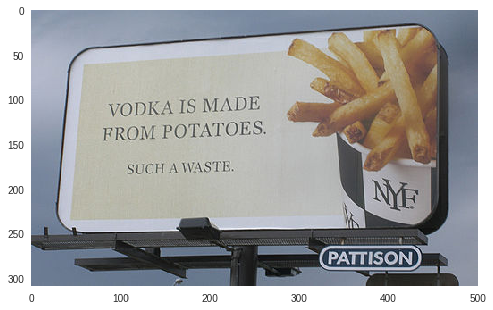

In [0]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/billboard.jpg'


image_file_name = basename(IMAGE_URL)
download_dir = '/content/images'
!mkdir -p $download_dir && rm -rf $download_dir/*
!wget -q -P $download_dir $IMAGE_URL
  

plt.imshow(matplotlib.image.imread(join(download_dir, image_file_name)))

Run EAST on the above test image:

In [0]:
!mkdir -p output
!cd $project_name && python eval.py --test_data_path=$download_dir --gpu_list=0 --checkpoint_path=../$pretrained_model/ --output_dir=..

Now, visualize the result:

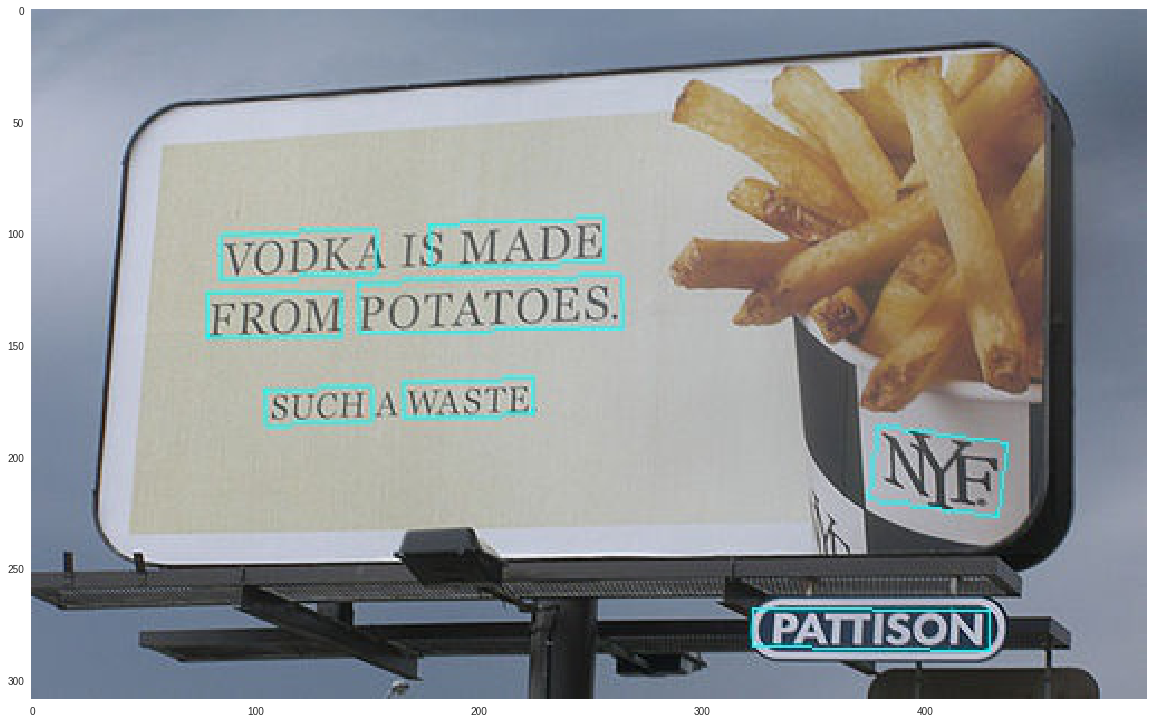

In [0]:
plt.figure(figsize=(20, 26))
plt.imshow(matplotlib.image.imread(image_file_name))